100%|██████████| 150/150 [00:10<00:00, 14.09it/s]


Steady state not reached within the given number of turns


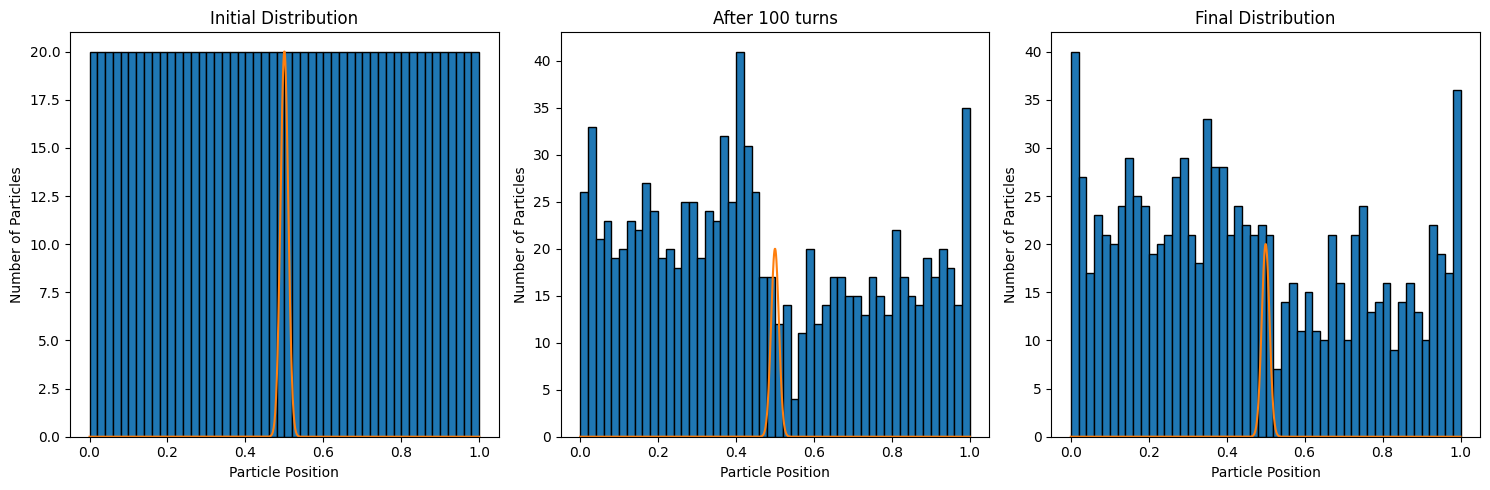

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
from ipywidgets import interact, IntSlider

# Parameters
num_particles = 1000  # Number of particles
num_turns = 150
kick_strength = 0.005  # Positive kick to create a hole
diffusion_rate = 0.02  # Rate of diffusion
steady_state_threshold = 1e-4  # Threshold for determining steady state
consecutive_steady_turns = 10  # Number of consecutive turns to confirm steady state

# Initial uniform distribution
particles_init = np.linspace(0, 1, num_particles)
particles = particles_init.copy()

mean = 0.5
std_dev = 0.01
particle_distributions = np.zeros((num_turns, num_particles))

bins = 50
bin_edges = np.linspace(0, 1, bins + 1)

steady_state_reached = False
steady_turn_counter = 0

# Simulation loop
for turn in tqdm(range(num_turns)):
    
    # Apply the kicking mechanism
    for particle_index in range(num_particles):
        random_number = np.random.rand()
        if random_number < norm.pdf(particles[particle_index], loc=mean, scale=std_dev):
            particles[particle_index] -= kick_strength

    # Diffusion step (random walk)
    diffusion_steps = np.random.normal(0, diffusion_rate, num_particles)
    particles += diffusion_steps
    
    # Ensure particles stay within the boundaries [0, 1]
    particles = np.clip(particles, 0, 1)
    
    particle_distributions[turn] = particles.copy()
    
    if turn > 0:
        # Calculate the histogram difference between successive turns
        hist_prev, _ = np.histogram(particle_distributions[turn - 1], bins=bin_edges)
        hist_current, _ = np.histogram(particles, bins=bin_edges)
        hist_diff = np.linalg.norm(hist_current - hist_prev)
        
        if hist_diff < steady_state_threshold:
            steady_turn_counter += 1
        else:
            steady_turn_counter = 0
        
        if steady_turn_counter >= consecutive_steady_turns:
            steady_state_reached = True
            print(f"Steady state reached at turn {turn}")
            break

if not steady_state_reached:
    print("Steady state not reached within the given number of turns")

gaussian_height = max(norm.pdf(particles_init, loc=mean, scale=std_dev))
max_height_init = num_particles / bins
scale = max_height_init / gaussian_height

# Plot the initial, intermediate, and final particle distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(particles_init, bins=bins, edgecolor='black')
plt.plot(particles_init, scale * norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
plt.title('Initial Distribution')
plt.xlabel('Particle Position')
plt.ylabel('Number of Particles')

plt.subplot(1, 3, 2)
plt.hist(particle_distributions[100], bins=bins, edgecolor='black')
plt.plot(particles_init, scale * norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
plt.title(f'After {100} turns')
plt.xlabel('Particle Position')
plt.ylabel('Number of Particles')

plt.subplot(1, 3, 3)
plt.hist(particles, bins=bins, edgecolor='black')
plt.plot(particles_init, scale * norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
plt.title('Final Distribution')
plt.xlabel('Particle Position')
plt.ylabel('Number of Particles')

plt.tight_layout()
plt.show()


In [2]:
from ipywidgets import interact, IntSlider


# Function to update the plot based on the slider value
def update_plot(turn):
    plt.figure(figsize=(15, 5))
    plt.hist(particle_distributions[turn], bins=bins, edgecolor='black')
    plt.plot(particles_init, scale*norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
    plt.title(f'After {turn} turns')
    plt.xlabel('Particle Position')
    plt.ylabel('Number of Particles')
    plt.show()

# Create an interactive slider using ipywidgets
interact(update_plot, turn=IntSlider(min=0, max=num_turns-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='turn', max=149), Output()), _dom_classes=('widget-intera…

<function __main__.update_plot(turn)>

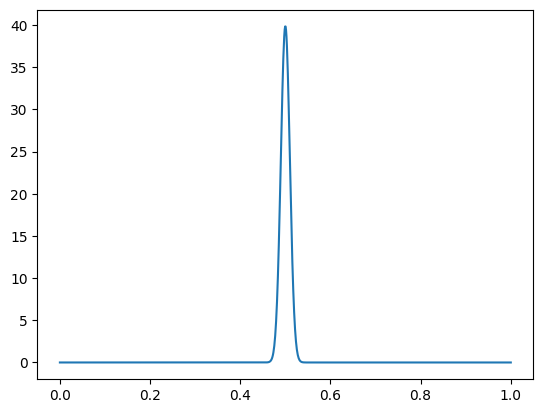

In [3]:
plt.plot(particles_init, norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')